In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
Train_data = pd.read_csv('Train_MM_OH.csv')
Validation_data = pd.read_csv('Valid_MM_OH.csv')
Test_data = pd.read_csv('Test_MM_OH.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             12000 non-null  float64
 1   AnnualIncome                    12000 non-null  float64
 2   CreditScore                     12000 non-null  float64
 3   Experience                      12000 non-null  float64
 4   LoanAmount                      12000 non-null  float64
 5   LoanDuration                    12000 non-null  float64
 6   NumberOfDependents              12000 non-null  float64
 7   MonthlyDebtPayments             12000 non-null  float64
 8   CreditCardUtilizationRate       12000 non-null  float64
 9   NumberOfOpenCreditLines         12000 non-null  float64
 10  NumberOfCreditInquiries         12000 non-null  float64
 11  DebtToIncomeRatio               12000 non-null  float64
 12  BankruptcyHistory               

In [3]:
Train_data.head()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,HomeStat_Other,HomeStat_Own,HomeStat_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,LoanApproved,RiskScore
0,0.629032,0.068100,0.455285,0.573770,0.067100,0.111111,0.4,0.123388,0.395935,0.153846,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.402174
1,0.209677,0.063154,0.661247,0.098361,0.213760,0.666667,0.8,0.089578,0.521424,0.153846,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.384058
2,0.354839,0.152409,0.720867,0.295082,0.077842,0.222222,0.8,0.161380,0.172911,0.076923,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.438406
3,0.661290,0.409754,0.875339,0.590164,0.088966,0.444444,0.0,0.123039,0.317895,0.153846,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.086957
4,0.225806,0.083607,0.626016,0.196721,0.185708,0.333333,0.2,0.171140,0.203913,0.076923,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.438406


In [4]:
X_training = Train_data.drop('LoanApproved',axis=1)
X_training = X_training.drop('RiskScore',axis=1)
y_training = Train_data['LoanApproved']

In [5]:
y_training.min()

0.0

In [6]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
X_validation = X_validation.drop('RiskScore',axis=1)
y_validation = Validation_data['LoanApproved']

In [7]:
X_testing = Test_data.drop('LoanApproved',axis=1)
X_testing = X_testing.drop('RiskScore',axis=1)
y_testing = Test_data['LoanApproved']

In [8]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [9]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [10]:
print(y_training)

[0. 0. 0. ... 1. 0. 0.]


In [11]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

Training Losses are 
          0
0  0.904177
1  0.864974
2  0.829409
3  0.797459
4  0.769013
Validation Data
Confusion Matrix for hidden layer 8
[[2975   69]
 [  96  860]]
Accuracy: 0.9587, Precision: 0.9257, Recall: 0.8996, F1-score: 0.9125

Test Data
Confusion Matrix for hiden layer 8
[[2980   64]
 [  81  875]]
Accuracy: 0.9637, Precision: 0.9318, Recall: 0.9153, F1-score: 0.9235



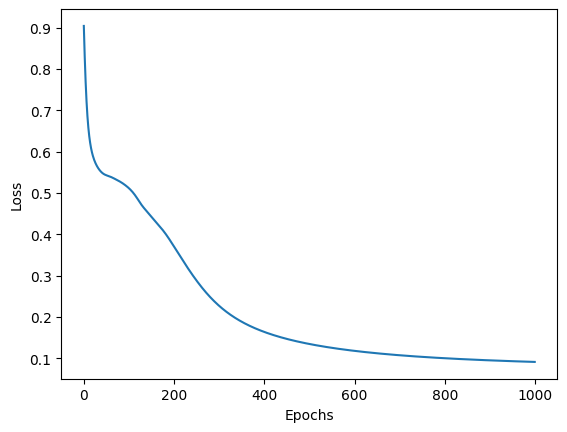

Training Losses are 
          0
0  0.835240
1  0.782186
2  0.736201
3  0.697012
4  0.664153
Validation Data
Confusion Matrix for hidden layer 16
[[2976   68]
 [  89  867]]
Accuracy: 0.9607, Precision: 0.9273, Recall: 0.9069, F1-score: 0.9170

Test Data
Confusion Matrix for hiden layer 16
[[2978   66]
 [  74  882]]
Accuracy: 0.9650, Precision: 0.9304, Recall: 0.9226, F1-score: 0.9265



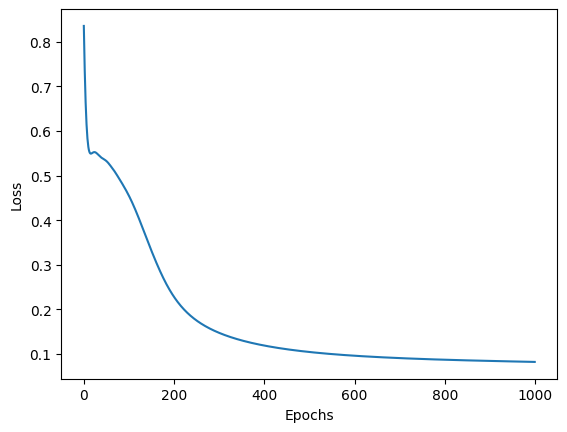

Training Losses are 
          0
0  0.703264
1  0.641813
2  0.597357
3  0.568500
4  0.552972
Validation Data
Confusion Matrix for hidden layer 32
[[2973   71]
 [  77  879]]
Accuracy: 0.9630, Precision: 0.9253, Recall: 0.9195, F1-score: 0.9224

Test Data
Confusion Matrix for hiden layer 32
[[2971   73]
 [  64  892]]
Accuracy: 0.9657, Precision: 0.9244, Recall: 0.9331, F1-score: 0.9287



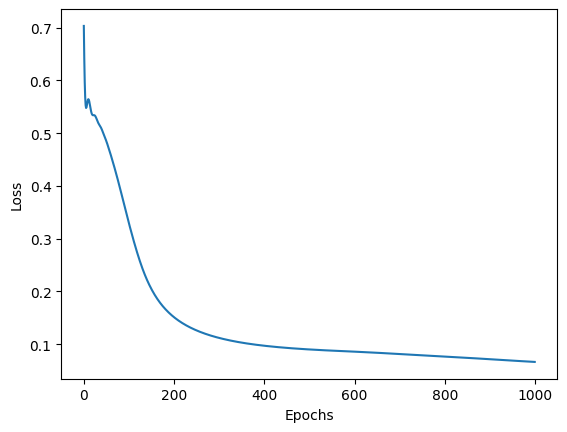

Training Losses are 
          0
0  0.638396
1  0.571168
2  0.547777
3  0.552657
4  0.564245
Validation Data
Confusion Matrix for hidden layer 64
[[2966   78]
 [  72  884]]
Accuracy: 0.9625, Precision: 0.9189, Recall: 0.9247, F1-score: 0.9218

Test Data
Confusion Matrix for hiden layer 64
[[2964   80]
 [  63  893]]
Accuracy: 0.9643, Precision: 0.9178, Recall: 0.9341, F1-score: 0.9259



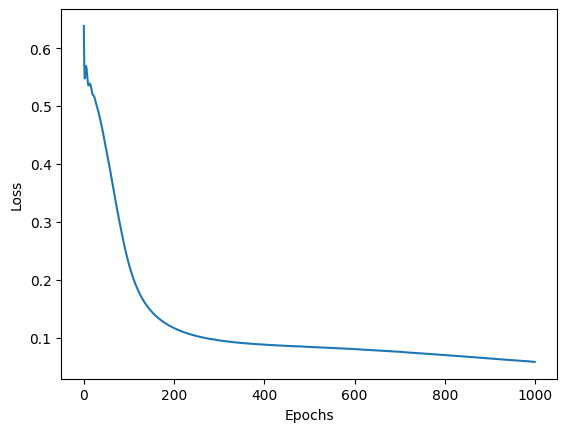

Training Losses are 
          0
0  0.755080
1  0.580655
2  0.553148
3  0.586050
4  0.611646
Validation Data
Confusion Matrix for hidden layer 128
[[2969   75]
 [  82  874]]
Accuracy: 0.9607, Precision: 0.9210, Recall: 0.9142, F1-score: 0.9176

Test Data
Confusion Matrix for hiden layer 128
[[2973   71]
 [  67  889]]
Accuracy: 0.9655, Precision: 0.9260, Recall: 0.9299, F1-score: 0.9280



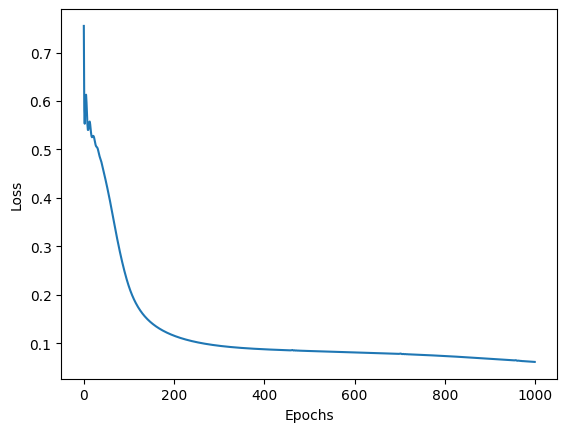

Best accuracy for test data is 0.96575 for degree 32


In [12]:
nuerons = [8,16,32,64,128]
min_loss = 0
best_degree = 1000
for nueron in nuerons:
  model = SingleLayer(49,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.Adam(model.parameters(), lr=0.01)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss:
    min_loss = acc
    best_degree = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss} for degree {best_degree}")

In [13]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.598799
1  0.597694
2  0.596602
3  0.595522
4  0.594454
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3013   31]
 [ 318  638]]
Accuracy: 0.9127, Precision: 0.9537, Recall: 0.6674, F1-score: 0.7852

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3015   29]
 [ 304  652]]
Accuracy: 0.9167, Precision: 0.9574, Recall: 0.6820, F1-score: 0.7966



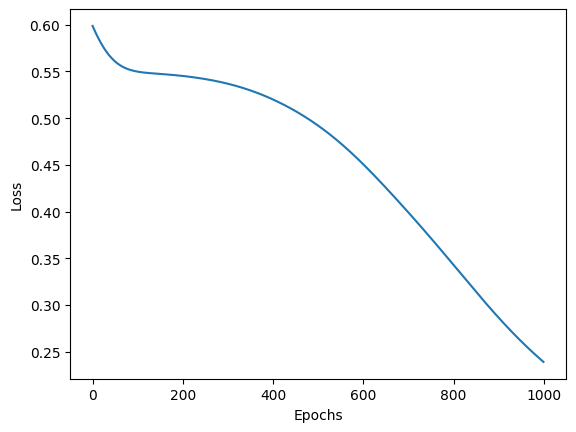

Training Losses are 
          0
0  0.917253
1  0.912112
2  0.907017
3  0.901967
4  0.896963
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


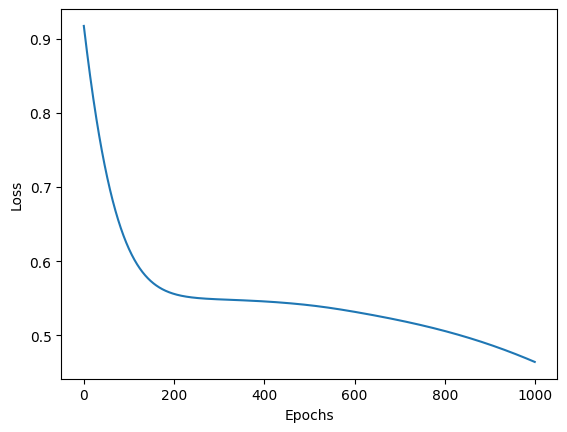

Training Losses are 
          0
0  0.697659
1  0.692287
2  0.687020
3  0.681863
4  0.676815
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[2998   46]
 [ 223  733]]
Accuracy: 0.9327, Precision: 0.9409, Recall: 0.7667, F1-score: 0.8450

Test Data
Confusion Matrix for hiden layer 8 and 32
[[3003   41]
 [ 194  762]]
Accuracy: 0.9413, Precision: 0.9489, Recall: 0.7971, F1-score: 0.8664



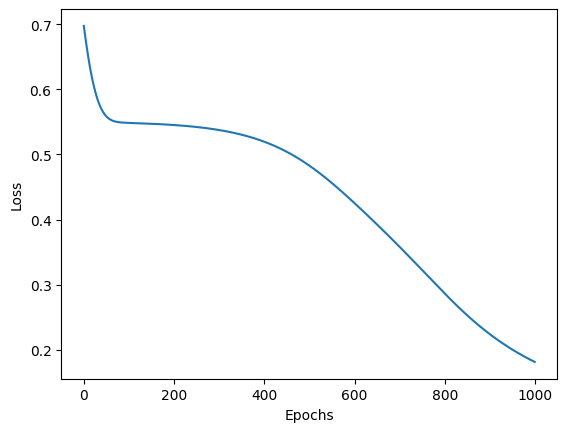

Training Losses are 
          0
0  0.699928
1  0.690121
2  0.680681
3  0.671612
4  0.662919
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[2990   54]
 [ 141  815]]
Accuracy: 0.9513, Precision: 0.9379, Recall: 0.8525, F1-score: 0.8932

Test Data
Confusion Matrix for hiden layer 8 and 64
[[2989   55]
 [ 128  828]]
Accuracy: 0.9543, Precision: 0.9377, Recall: 0.8661, F1-score: 0.9005



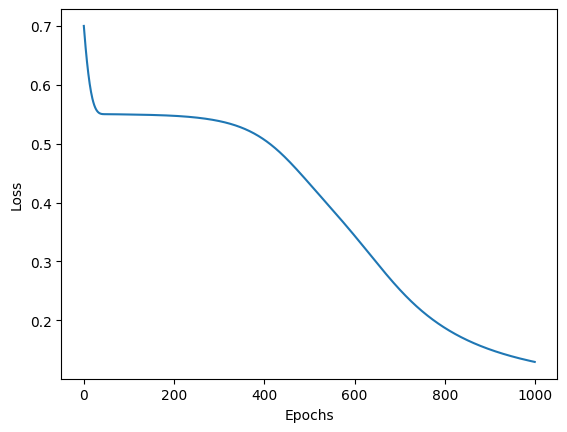

Training Losses are 
          0
0  0.617338
1  0.615823
2  0.614325
3  0.612844
4  0.611381
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3017   27]
 [ 312  644]]
Accuracy: 0.9153, Precision: 0.9598, Recall: 0.6736, F1-score: 0.7916

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3023   21]
 [ 305  651]]
Accuracy: 0.9185, Precision: 0.9688, Recall: 0.6810, F1-score: 0.7998



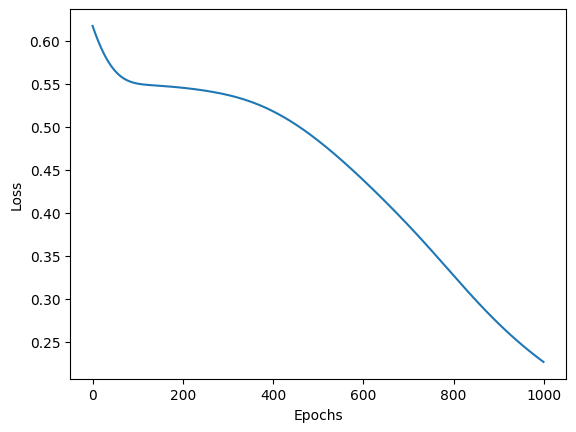

Training Losses are 
          0
0  0.593399
1  0.591403
2  0.589452
3  0.587547
4  0.585690
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[2988   56]
 [ 131  825]]
Accuracy: 0.9533, Precision: 0.9364, Recall: 0.8630, F1-score: 0.8982

Test Data
Confusion Matrix for hiden layer 16 and 16
[[2993   51]
 [ 118  838]]
Accuracy: 0.9577, Precision: 0.9426, Recall: 0.8766, F1-score: 0.9084



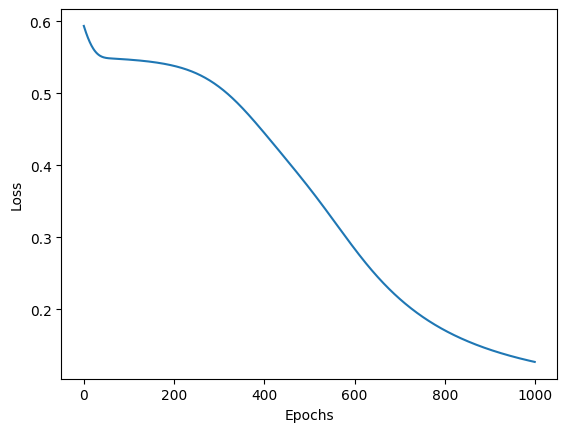

Training Losses are 
          0
0  0.672909
1  0.667305
2  0.661844
3  0.656531
4  0.651365
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[2995   49]
 [ 165  791]]
Accuracy: 0.9465, Precision: 0.9417, Recall: 0.8274, F1-score: 0.8808

Test Data
Confusion Matrix for hiden layer 16 and 32
[[2999   45]
 [ 153  803]]
Accuracy: 0.9505, Precision: 0.9469, Recall: 0.8400, F1-score: 0.8902



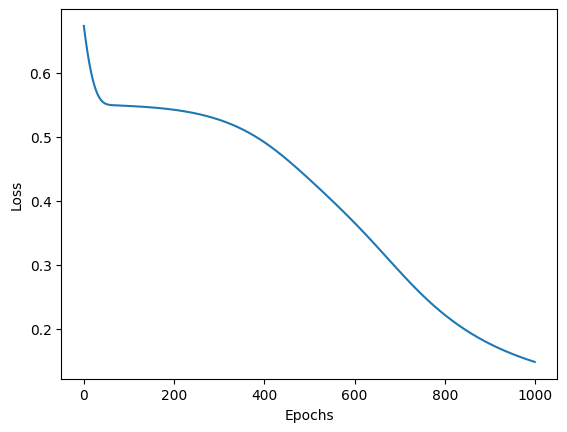

Training Losses are 
          0
0  0.764287
1  0.750654
2  0.737526
3  0.724906
4  0.712799
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[2988   56]
 [ 144  812]]
Accuracy: 0.9500, Precision: 0.9355, Recall: 0.8494, F1-score: 0.8904

Test Data
Confusion Matrix for hiden layer 16 and 64
[[2987   57]
 [ 134  822]]
Accuracy: 0.9523, Precision: 0.9352, Recall: 0.8598, F1-score: 0.8959



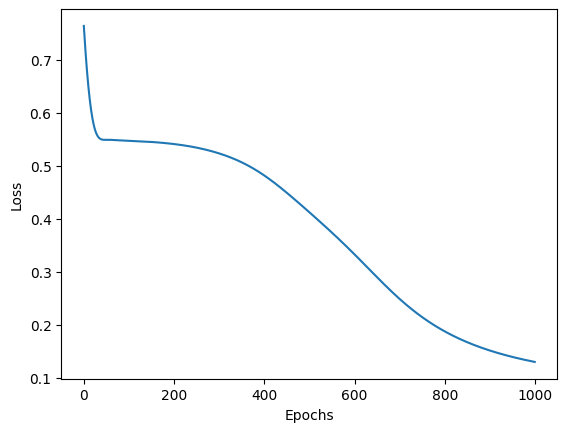

Training Losses are 
          0
0  0.715847
1  0.712729
2  0.709647
3  0.706600
4  0.703590
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3016   28]
 [ 440  516]]
Accuracy: 0.8830, Precision: 0.9485, Recall: 0.5397, F1-score: 0.6880

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3018   26]
 [ 427  529]]
Accuracy: 0.8868, Precision: 0.9532, Recall: 0.5533, F1-score: 0.7002



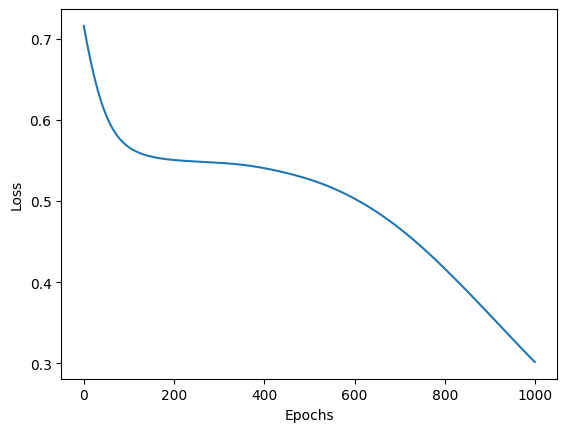

Training Losses are 
          0
0  0.626846
1  0.623527
2  0.620286
3  0.617126
4  0.614048
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[2998   46]
 [ 176  780]]
Accuracy: 0.9445, Precision: 0.9443, Recall: 0.8159, F1-score: 0.8754

Test Data
Confusion Matrix for hiden layer 32 and 16
[[3000   44]
 [ 162  794]]
Accuracy: 0.9485, Precision: 0.9475, Recall: 0.8305, F1-score: 0.8852



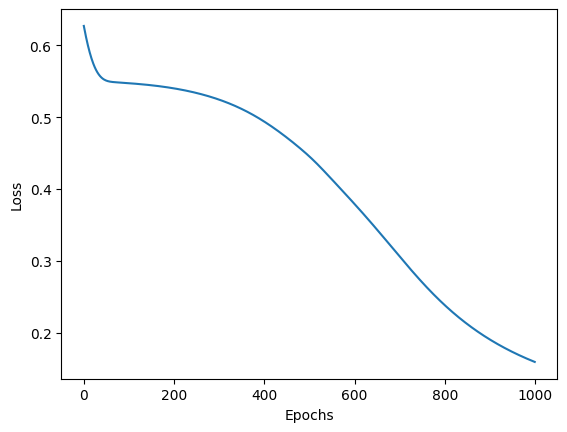

Training Losses are 
          0
0  0.769109
1  0.758665
2  0.748514
3  0.738656
4  0.729093
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[2992   52]
 [ 181  775]]
Accuracy: 0.9417, Precision: 0.9371, Recall: 0.8107, F1-score: 0.8693

Test Data
Confusion Matrix for hiden layer 32 and 32
[[2996   48]
 [ 166  790]]
Accuracy: 0.9465, Precision: 0.9427, Recall: 0.8264, F1-score: 0.8807



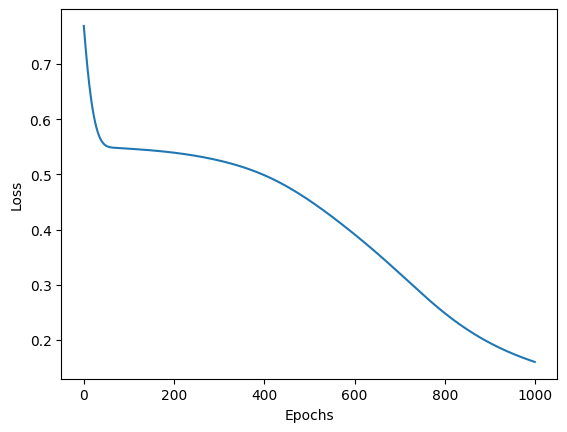

Training Losses are 
          0
0  0.744200
1  0.729261
2  0.714975
3  0.701352
4  0.688399
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[2978   66]
 [ 114  842]]
Accuracy: 0.9550, Precision: 0.9273, Recall: 0.8808, F1-score: 0.9034

Test Data
Confusion Matrix for hiden layer 32 and 64
[[2982   62]
 [  98  858]]
Accuracy: 0.9600, Precision: 0.9326, Recall: 0.8975, F1-score: 0.9147



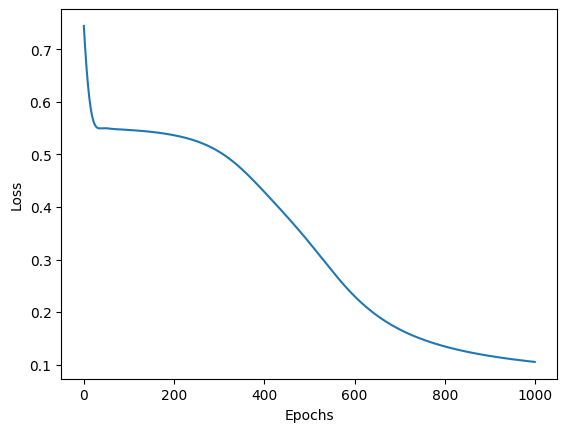

Training Losses are 
          0
0  0.626148
1  0.622761
2  0.619466
3  0.616263
4  0.613156
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[2988   56]
 [ 136  820]]
Accuracy: 0.9520, Precision: 0.9361, Recall: 0.8577, F1-score: 0.8952

Test Data
Confusion Matrix for hiden layer 64 and 8
[[2990   54]
 [ 126  830]]
Accuracy: 0.9550, Precision: 0.9389, Recall: 0.8682, F1-score: 0.9022



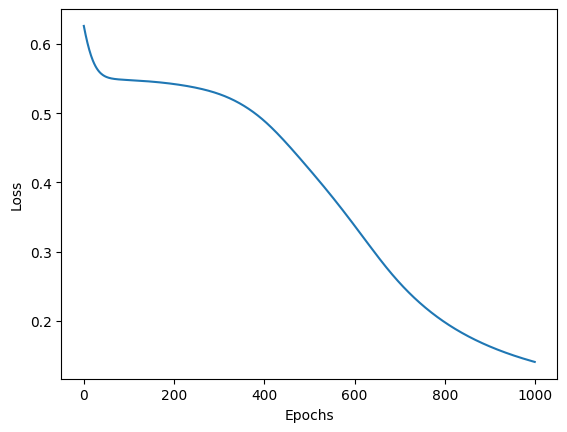

Training Losses are 
          0
0  0.798006
1  0.787646
2  0.777519
3  0.767634
4  0.757995
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[2989   55]
 [ 185  771]]
Accuracy: 0.9400, Precision: 0.9334, Recall: 0.8065, F1-score: 0.8653

Test Data
Confusion Matrix for hiden layer 64 and 16
[[2991   53]
 [ 172  784]]
Accuracy: 0.9437, Precision: 0.9367, Recall: 0.8201, F1-score: 0.8745



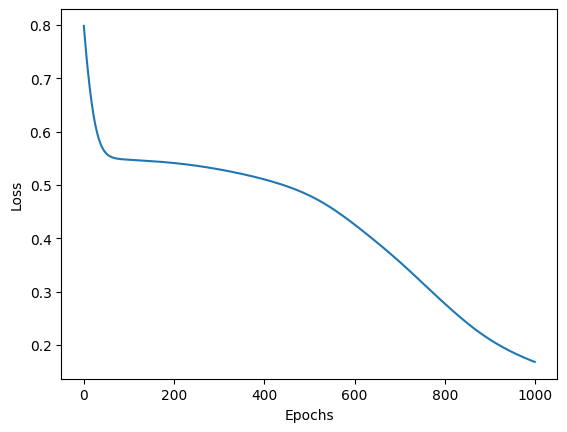

Training Losses are 
          0
0  0.744747
1  0.732350
2  0.720418
3  0.708961
4  0.697984
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[2983   61]
 [ 123  833]]
Accuracy: 0.9540, Precision: 0.9318, Recall: 0.8713, F1-score: 0.9005

Test Data
Confusion Matrix for hiden layer 64 and 32
[[2984   60]
 [ 110  846]]
Accuracy: 0.9575, Precision: 0.9338, Recall: 0.8849, F1-score: 0.9087



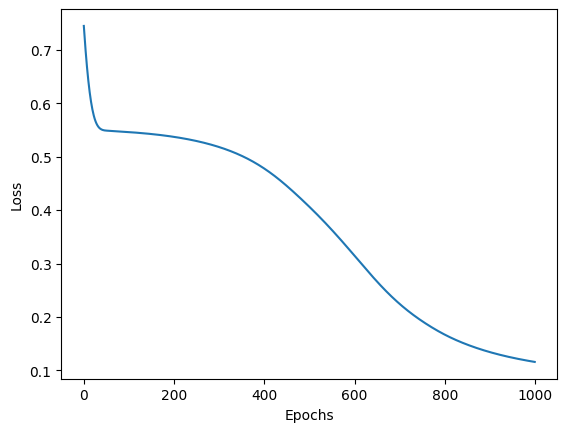

Training Losses are 
          0
0  0.655359
1  0.641282
2  0.628305
3  0.616436
4  0.605672
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[2973   71]
 [  94  862]]
Accuracy: 0.9587, Precision: 0.9239, Recall: 0.9017, F1-score: 0.9127

Test Data
Confusion Matrix for hiden layer 64 and 64
[[2977   67]
 [  73  883]]
Accuracy: 0.9650, Precision: 0.9295, Recall: 0.9236, F1-score: 0.9265



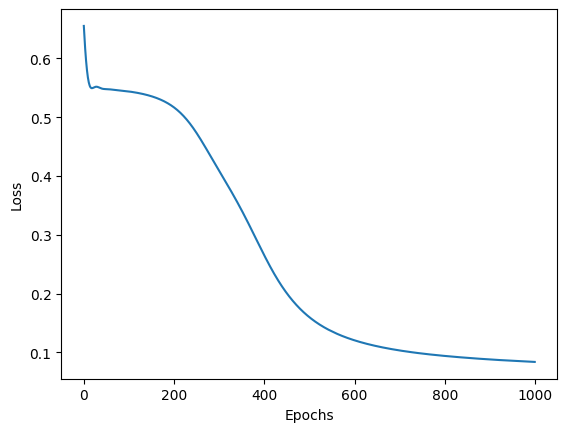

Best accuracy for test data is 0.965 for degree 64


In [14]:
nuerons = [8,16,32,64]
best_degree_3=0
best_accuracy_2=0

for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(49,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_2:
          best_accuracy_2=acc
          best_degree_4=nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_2} for degree {best_degree_4}")

In [15]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.771335
1  0.769288
2  0.767248
3  0.765214
4  0.763185
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


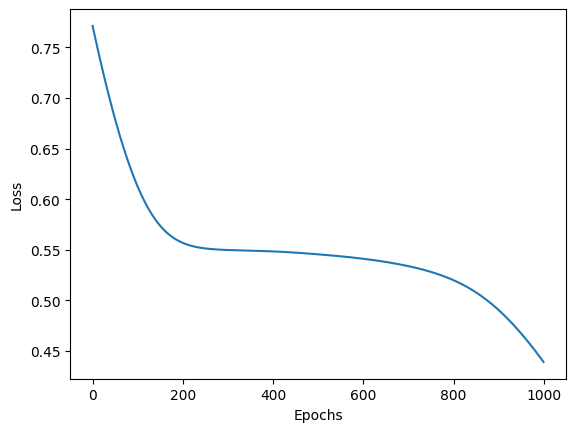

Training Losses are 
          0
0  0.646871
1  0.644695
2  0.642547
3  0.640427
4  0.638336
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[2981   63]
 [ 133  823]]
Accuracy: 0.9510, Precision: 0.9289, Recall: 0.8609, F1-score: 0.8936

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[2983   61]
 [ 126  830]]
Accuracy: 0.9533, Precision: 0.9315, Recall: 0.8682, F1-score: 0.8988



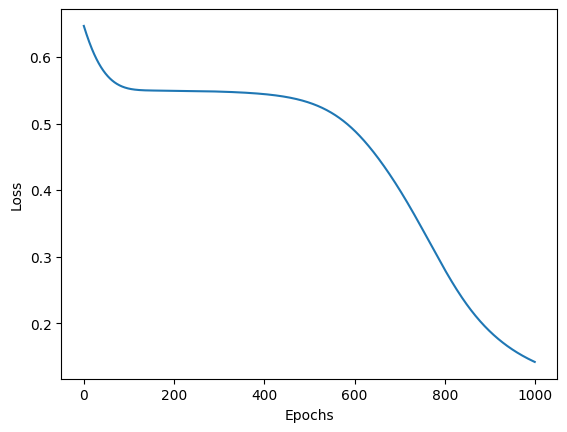

Training Losses are 
          0
0  0.642120
1  0.637872
2  0.633731
3  0.629698
4  0.625775
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[2975   69]
 [ 111  845]]
Accuracy: 0.9550, Precision: 0.9245, Recall: 0.8839, F1-score: 0.9037

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[2977   67]
 [  95  861]]
Accuracy: 0.9595, Precision: 0.9278, Recall: 0.9006, F1-score: 0.9140



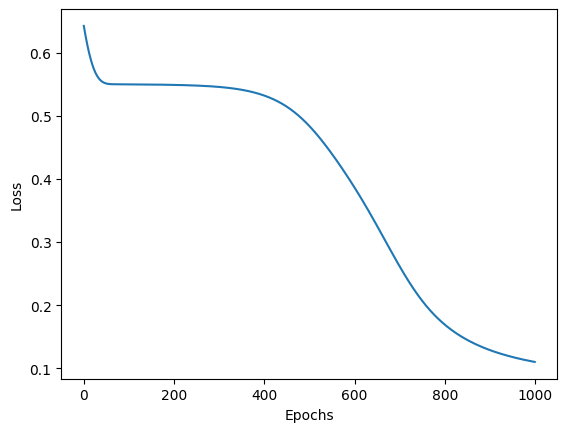

Training Losses are 
          0
0  0.635849
1  0.628351
2  0.621228
3  0.614484
4  0.608119
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[2971   73]
 [ 103  853]]
Accuracy: 0.9560, Precision: 0.9212, Recall: 0.8923, F1-score: 0.9065

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[2976   68]
 [  80  876]]
Accuracy: 0.9630, Precision: 0.9280, Recall: 0.9163, F1-score: 0.9221



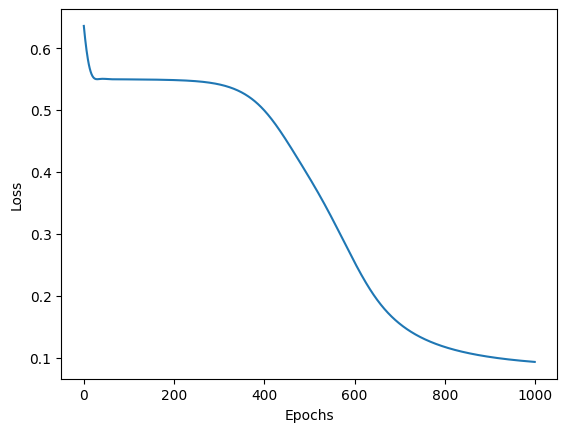

Training Losses are 
          0
0  0.586658
1  0.585664
2  0.584684
3  0.583716
4  0.582762
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[2997   47]
 [ 156  800]]
Accuracy: 0.9493, Precision: 0.9445, Recall: 0.8368, F1-score: 0.8874

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[3003   41]
 [ 148  808]]
Accuracy: 0.9527, Precision: 0.9517, Recall: 0.8452, F1-score: 0.8953



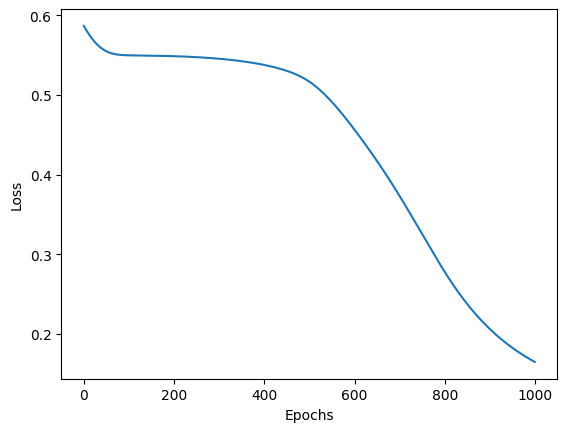

Training Losses are 
          0
0  0.610386
1  0.608193
2  0.606039
3  0.603928
4  0.601859
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[2973   71]
 [ 106  850]]
Accuracy: 0.9557, Precision: 0.9229, Recall: 0.8891, F1-score: 0.9057

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[2974   70]
 [  90  866]]
Accuracy: 0.9600, Precision: 0.9252, Recall: 0.9059, F1-score: 0.9154



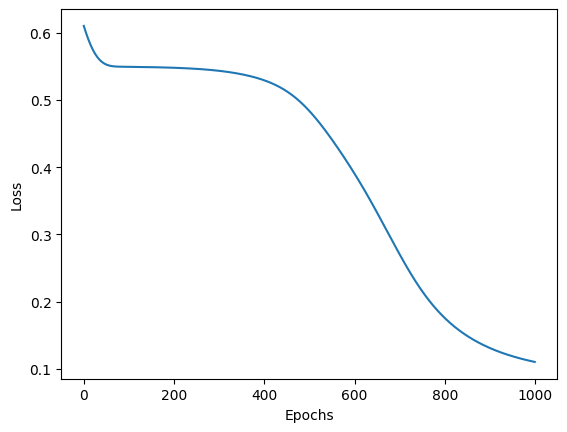

Training Losses are 
          0
0  0.779962
1  0.772101
2  0.764384
3  0.756814
4  0.749394
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[2992   52]
 [ 181  775]]
Accuracy: 0.9417, Precision: 0.9371, Recall: 0.8107, F1-score: 0.8693

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[2994   50]
 [ 162  794]]
Accuracy: 0.9470, Precision: 0.9408, Recall: 0.8305, F1-score: 0.8822



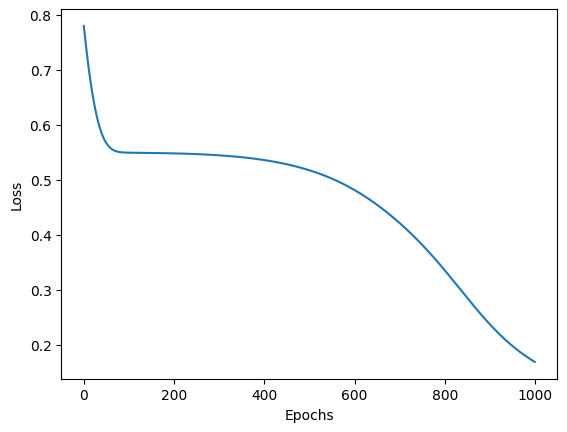

Training Losses are 
          0
0  0.795567
1  0.781066
2  0.767035
3  0.753481
4  0.740411
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[2969   75]
 [ 108  848]]
Accuracy: 0.9543, Precision: 0.9187, Recall: 0.8870, F1-score: 0.9026

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[2972   72]
 [  88  868]]
Accuracy: 0.9600, Precision: 0.9234, Recall: 0.9079, F1-score: 0.9156



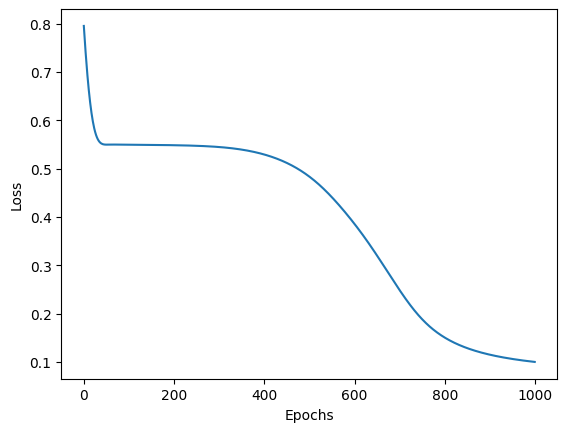

Training Losses are 
          0
0  0.702601
1  0.699614
2  0.696658
3  0.693734
4  0.690843
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[3020   24]
 [ 558  398]]
Accuracy: 0.8545, Precision: 0.9431, Recall: 0.4163, F1-score: 0.5776

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[3018   26]
 [ 581  375]]
Accuracy: 0.8482, Precision: 0.9352, Recall: 0.3923, F1-score: 0.5527



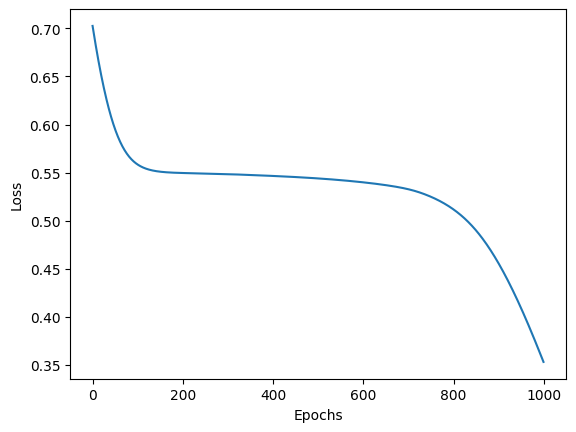

Training Losses are 
          0
0  0.723355
1  0.718772
2  0.714258
3  0.709815
4  0.705443
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[2973   71]
 [ 115  841]]
Accuracy: 0.9535, Precision: 0.9221, Recall: 0.8797, F1-score: 0.9004

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[2976   68]
 [ 101  855]]
Accuracy: 0.9577, Precision: 0.9263, Recall: 0.8944, F1-score: 0.9101



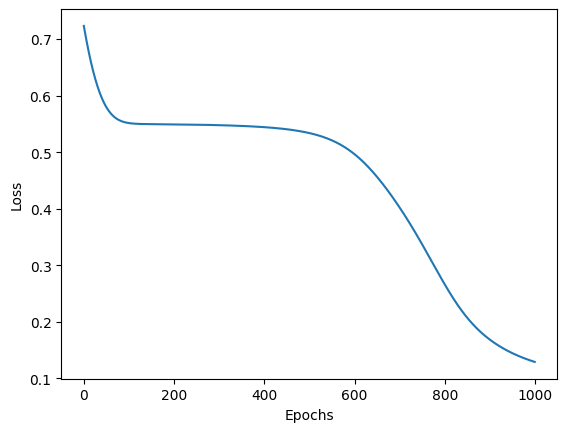

Training Losses are 
          0
0  0.587611
1  0.584118
2  0.580803
3  0.577667
4  0.574713
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[2964   80]
 [  87  869]]
Accuracy: 0.9583, Precision: 0.9157, Recall: 0.9090, F1-score: 0.9123

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[2974   70]
 [  71  885]]
Accuracy: 0.9647, Precision: 0.9267, Recall: 0.9257, F1-score: 0.9262



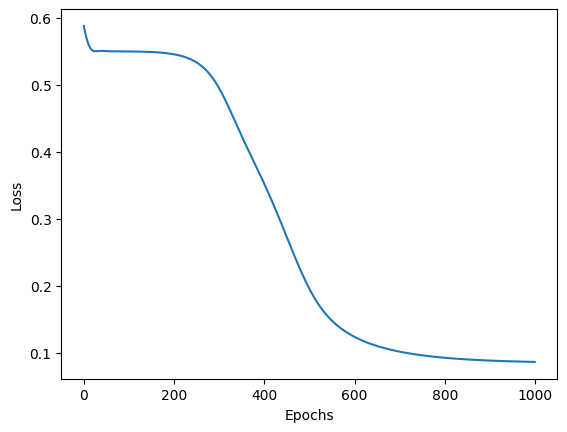

Training Losses are 
          0
0  0.585328
1  0.579646
2  0.574496
3  0.569879
4  0.565792
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[2966   78]
 [  89  867]]
Accuracy: 0.9583, Precision: 0.9175, Recall: 0.9069, F1-score: 0.9122

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[2971   73]
 [  73  883]]
Accuracy: 0.9635, Precision: 0.9236, Recall: 0.9236, F1-score: 0.9236



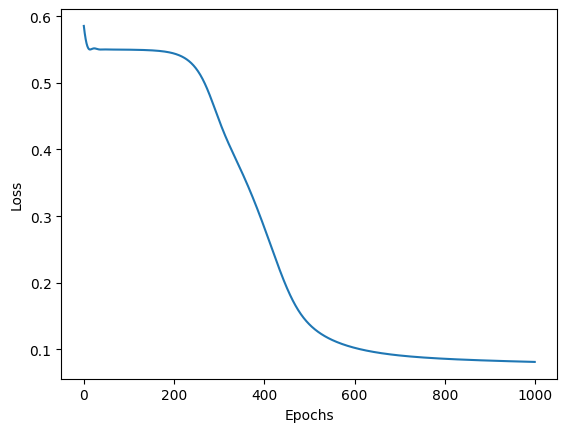

Training Losses are 
          0
0  0.696967
1  0.692135
2  0.687403
3  0.682774
4  0.678249
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[2974   70]
 [ 114  842]]
Accuracy: 0.9540, Precision: 0.9232, Recall: 0.8808, F1-score: 0.9015

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[2977   67]
 [ 100  856]]
Accuracy: 0.9583, Precision: 0.9274, Recall: 0.8954, F1-score: 0.9111



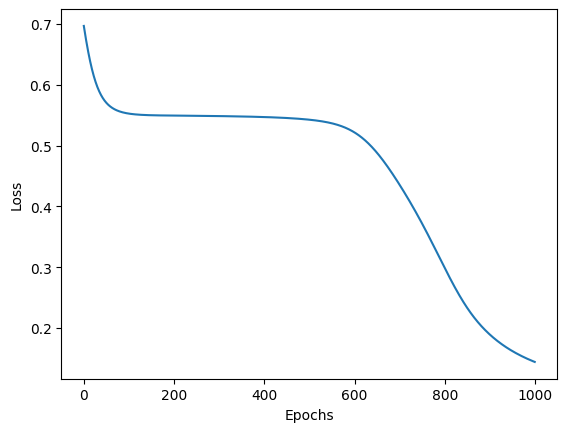

Training Losses are 
          0
0  0.745031
1  0.737075
2  0.729312
3  0.721749
4  0.714389
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[2972   72]
 [ 116  840]]
Accuracy: 0.9530, Precision: 0.9211, Recall: 0.8787, F1-score: 0.8994

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[2976   68]
 [ 101  855]]
Accuracy: 0.9577, Precision: 0.9263, Recall: 0.8944, F1-score: 0.9101



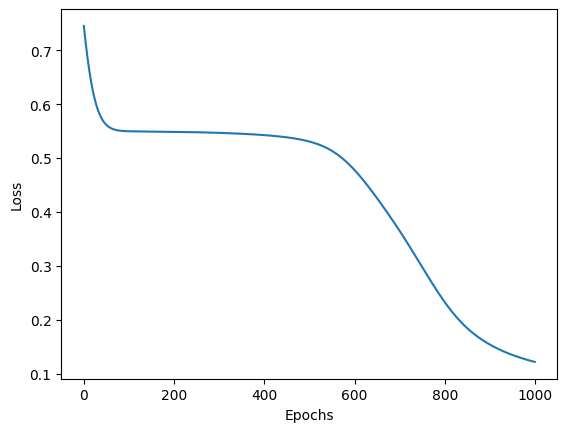

Training Losses are 
          0
0  0.753142
1  0.740043
2  0.727443
3  0.715351
4  0.703774
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[2966   78]
 [  94  862]]
Accuracy: 0.9570, Precision: 0.9170, Recall: 0.9017, F1-score: 0.9093

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[2976   68]
 [  73  883]]
Accuracy: 0.9647, Precision: 0.9285, Recall: 0.9236, F1-score: 0.9261



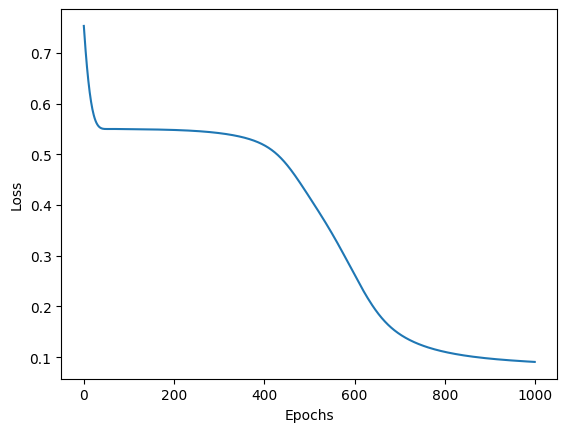

Training Losses are 
          0
0  0.716401
1  0.699469
2  0.683520
3  0.668570
4  0.654627
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[2965   79]
 [  84  872]]
Accuracy: 0.9593, Precision: 0.9169, Recall: 0.9121, F1-score: 0.9145

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[2976   68]
 [  70  886]]
Accuracy: 0.9655, Precision: 0.9287, Recall: 0.9268, F1-score: 0.9277



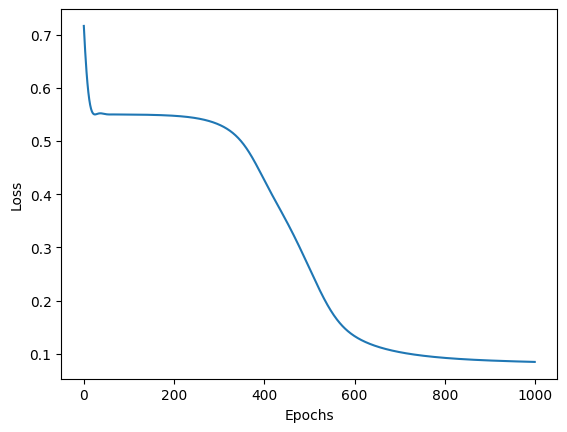

Training Losses are 
          0
0  0.771989
1  0.769474
2  0.766975
3  0.764493
4  0.762026
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


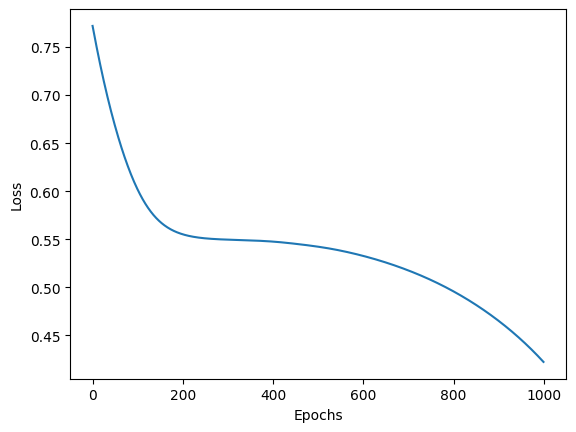

Training Losses are 
          0
0  0.744044
1  0.740481
2  0.736954
3  0.733463
4  0.730008
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[3026   18]
 [ 335  621]]
Accuracy: 0.9117, Precision: 0.9718, Recall: 0.6496, F1-score: 0.7787

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[3031   13]
 [ 324  632]]
Accuracy: 0.9157, Precision: 0.9798, Recall: 0.6611, F1-score: 0.7895



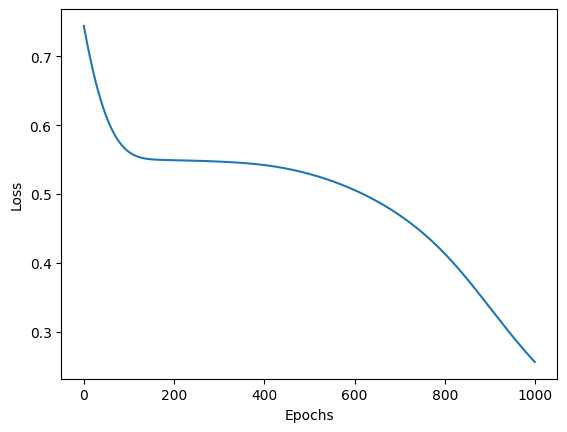

Training Losses are 
          0
0  0.615964
1  0.612251
2  0.608652
3  0.605170
4  0.601807
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[2968   76]
 [  94  862]]
Accuracy: 0.9575, Precision: 0.9190, Recall: 0.9017, F1-score: 0.9102

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[2974   70]
 [  76  880]]
Accuracy: 0.9635, Precision: 0.9263, Recall: 0.9205, F1-score: 0.9234



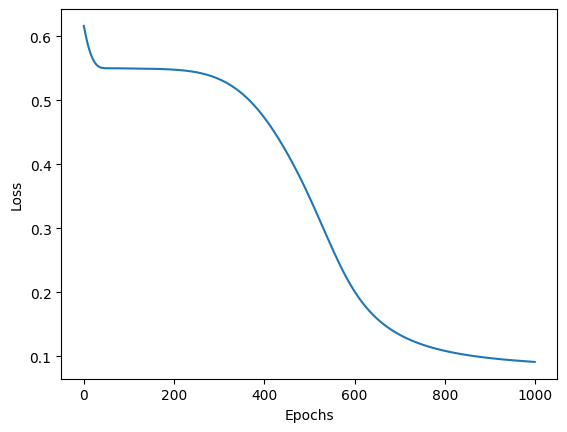

Training Losses are 
          0
0  0.696623
1  0.686868
2  0.677471
3  0.668440
4  0.659778
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[2971   73]
 [  99  857]]
Accuracy: 0.9570, Precision: 0.9215, Recall: 0.8964, F1-score: 0.9088

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[2977   67]
 [  82  874]]
Accuracy: 0.9627, Precision: 0.9288, Recall: 0.9142, F1-score: 0.9215



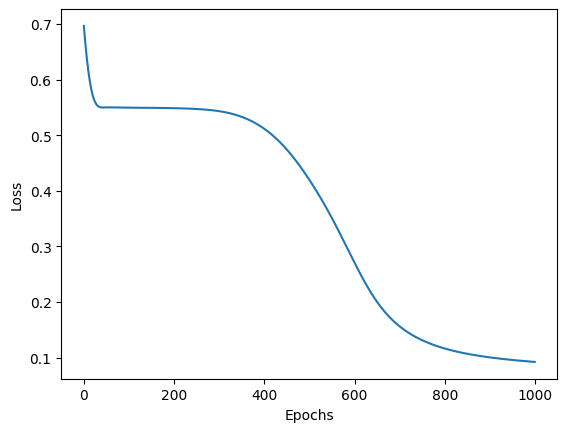

Training Losses are 
          0
0  0.622606
1  0.620979
2  0.619368
3  0.617773
4  0.616195
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[2976   68]
 [ 113  843]]
Accuracy: 0.9547, Precision: 0.9254, Recall: 0.8818, F1-score: 0.9031

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[2977   67]
 [  89  867]]
Accuracy: 0.9610, Precision: 0.9283, Recall: 0.9069, F1-score: 0.9175



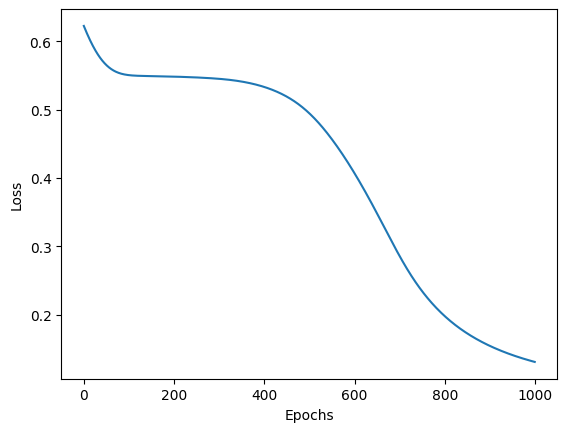

Training Losses are 
          0
0  0.596999
1  0.594802
2  0.592661
3  0.590576
4  0.588548
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[2979   65]
 [ 110  846]]
Accuracy: 0.9563, Precision: 0.9286, Recall: 0.8849, F1-score: 0.9063

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[2972   72]
 [  98  858]]
Accuracy: 0.9575, Precision: 0.9226, Recall: 0.8975, F1-score: 0.9099



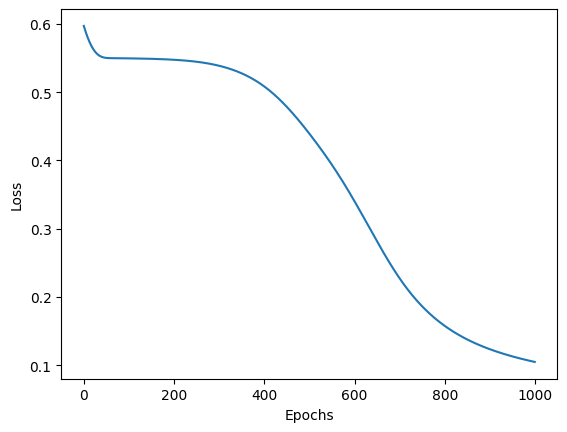

Training Losses are 
          0
0  0.695996
1  0.689664
2  0.683471
3  0.677421
4  0.671516
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[2968   76]
 [  99  857]]
Accuracy: 0.9563, Precision: 0.9185, Recall: 0.8964, F1-score: 0.9074

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[2971   73]
 [  80  876]]
Accuracy: 0.9617, Precision: 0.9231, Recall: 0.9163, F1-score: 0.9197



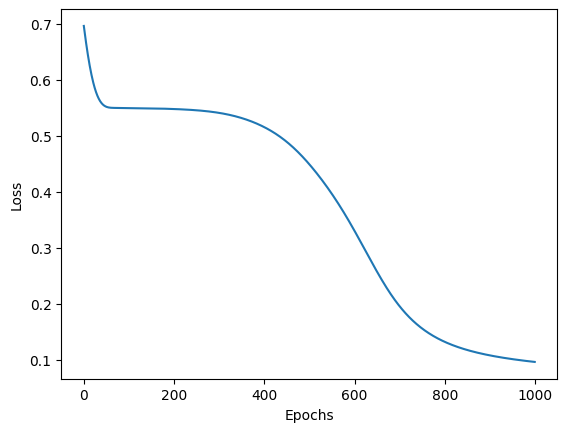

Training Losses are 
          0
0  0.812453
1  0.797966
2  0.783921
3  0.770326
4  0.757187
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[2971   73]
 [  99  857]]
Accuracy: 0.9570, Precision: 0.9215, Recall: 0.8964, F1-score: 0.9088

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[2973   71]
 [  82  874]]
Accuracy: 0.9617, Precision: 0.9249, Recall: 0.9142, F1-score: 0.9195



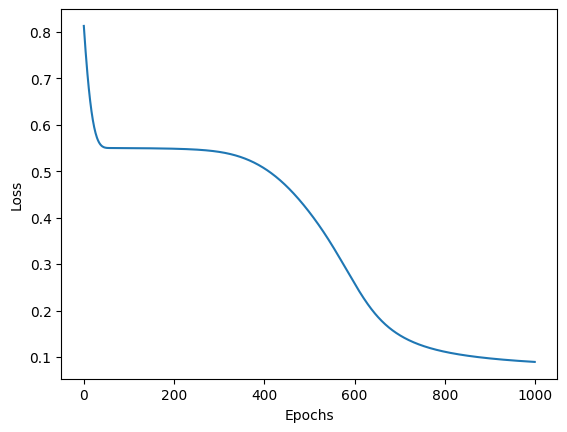

Training Losses are 
          0
0  0.618719
1  0.616736
2  0.614774
3  0.612834
4  0.610917
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[2976   68]
 [ 113  843]]
Accuracy: 0.9547, Precision: 0.9254, Recall: 0.8818, F1-score: 0.9031

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[2972   72]
 [  90  866]]
Accuracy: 0.9595, Precision: 0.9232, Recall: 0.9059, F1-score: 0.9145



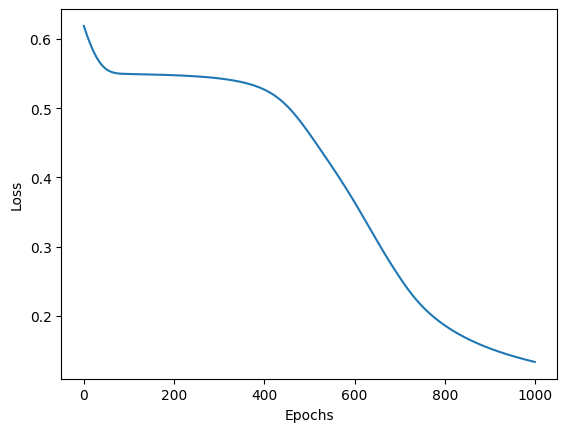

Training Losses are 
          0
0  0.649949
1  0.646367
2  0.642858
3  0.639423
4  0.636063
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[2970   74]
 [  96  860]]
Accuracy: 0.9575, Precision: 0.9208, Recall: 0.8996, F1-score: 0.9101

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[2963   81]
 [  82  874]]
Accuracy: 0.9593, Precision: 0.9152, Recall: 0.9142, F1-score: 0.9147



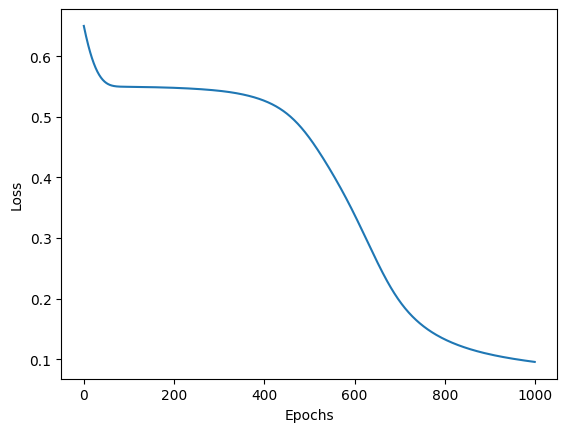

Training Losses are 
          0
0  0.785124
1  0.775599
2  0.766289
3  0.757197
4  0.748325
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[2975   69]
 [ 122  834]]
Accuracy: 0.9523, Precision: 0.9236, Recall: 0.8724, F1-score: 0.8973

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[2976   68]
 [ 110  846]]
Accuracy: 0.9555, Precision: 0.9256, Recall: 0.8849, F1-score: 0.9048



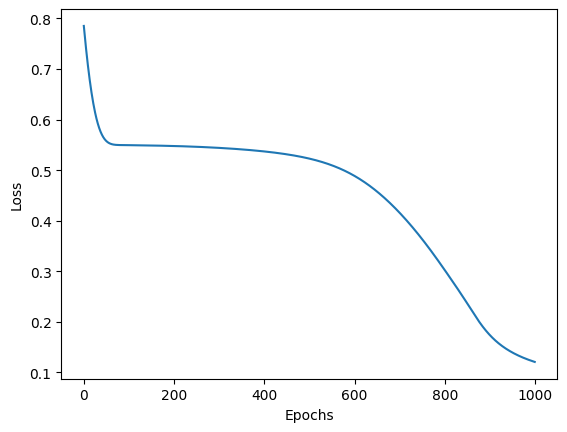

Training Losses are 
          0
0  0.611522
1  0.603076
2  0.595301
3  0.588202
4  0.581780
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[2969   75]
 [  87  869]]
Accuracy: 0.9595, Precision: 0.9206, Recall: 0.9090, F1-score: 0.9147

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[2977   67]
 [  72  884]]
Accuracy: 0.9653, Precision: 0.9295, Recall: 0.9247, F1-score: 0.9271



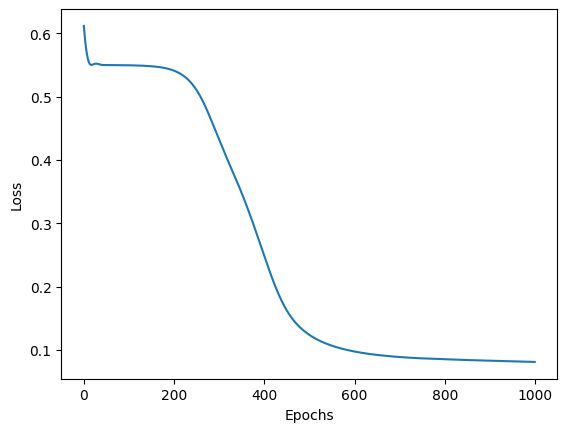

Training Losses are 
          0
0  0.716819
1  0.711670
2  0.706595
3  0.701600
4  0.696687
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[2987   57]
 [ 152  804]]
Accuracy: 0.9477, Precision: 0.9338, Recall: 0.8410, F1-score: 0.8850

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[2990   54]
 [ 145  811]]
Accuracy: 0.9503, Precision: 0.9376, Recall: 0.8483, F1-score: 0.8907



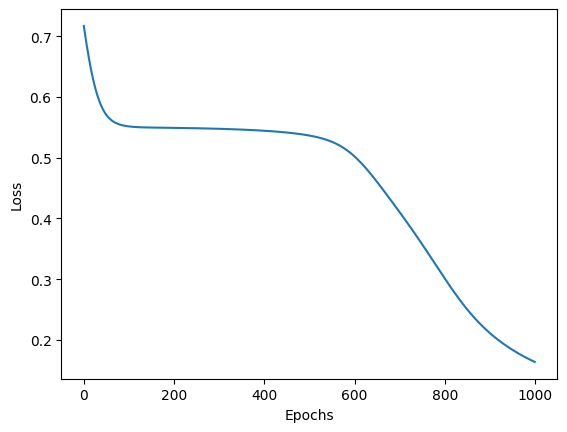

Training Losses are 
          0
0  0.818399
1  0.809423
2  0.800620
3  0.791995
4  0.783553
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[2981   63]
 [ 164  792]]
Accuracy: 0.9433, Precision: 0.9263, Recall: 0.8285, F1-score: 0.8747

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[2982   62]
 [ 153  803]]
Accuracy: 0.9463, Precision: 0.9283, Recall: 0.8400, F1-score: 0.8819



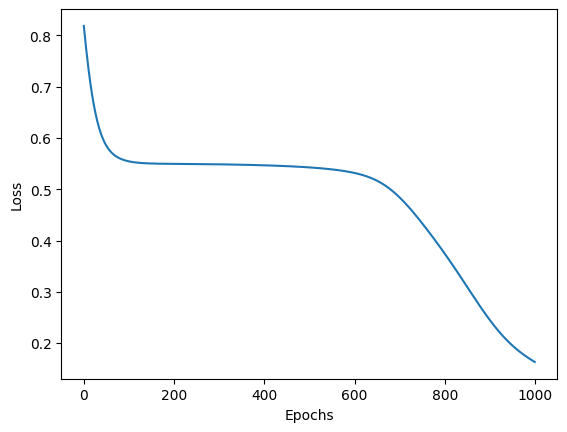

Training Losses are 
          0
0  0.776116
1  0.764054
2  0.752373
3  0.741077
4  0.730172
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[2970   74]
 [ 100  856]]
Accuracy: 0.9565, Precision: 0.9204, Recall: 0.8954, F1-score: 0.9077

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[2962   82]
 [  81  875]]
Accuracy: 0.9593, Precision: 0.9143, Recall: 0.9153, F1-score: 0.9148



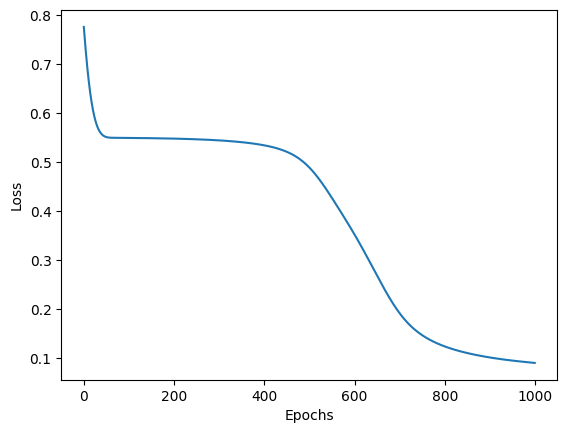

Training Losses are 
          0
0  0.661234
1  0.646373
2  0.632673
3  0.620142
4  0.608777
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[2969   75]
 [  87  869]]
Accuracy: 0.9595, Precision: 0.9206, Recall: 0.9090, F1-score: 0.9147

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[2967   77]
 [  70  886]]
Accuracy: 0.9633, Precision: 0.9200, Recall: 0.9268, F1-score: 0.9234



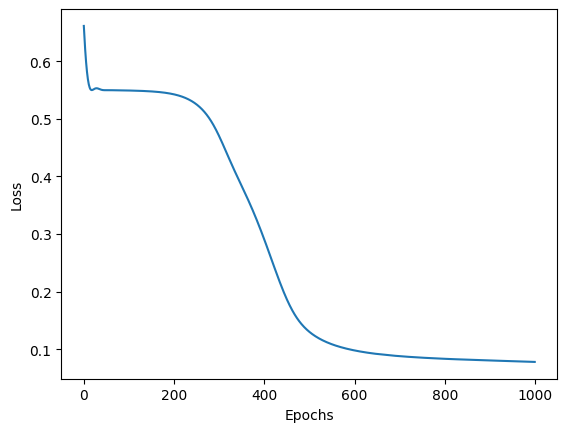

Training Losses are 
          0
0  0.573107
1  0.572325
2  0.571556
3  0.570798
4  0.570053
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[2979   65]
 [ 122  834]]
Accuracy: 0.9533, Precision: 0.9277, Recall: 0.8724, F1-score: 0.8992

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[2977   67]
 [ 108  848]]
Accuracy: 0.9563, Precision: 0.9268, Recall: 0.8870, F1-score: 0.9065



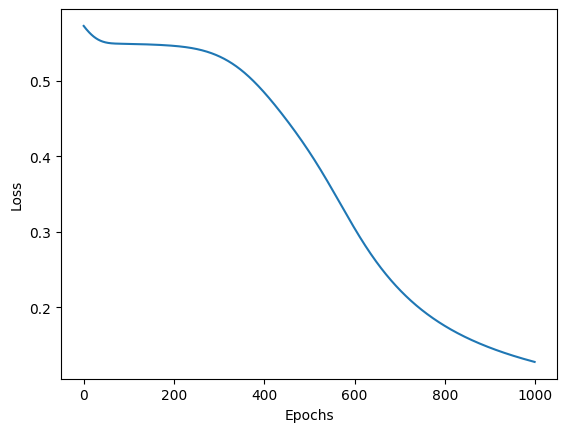

Training Losses are 
          0
0  0.741153
1  0.737189
2  0.733267
3  0.729388
4  0.725553
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[2975   69]
 [ 120  836]]
Accuracy: 0.9527, Precision: 0.9238, Recall: 0.8745, F1-score: 0.8984

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[2980   64]
 [ 109  847]]
Accuracy: 0.9567, Precision: 0.9297, Recall: 0.8860, F1-score: 0.9073



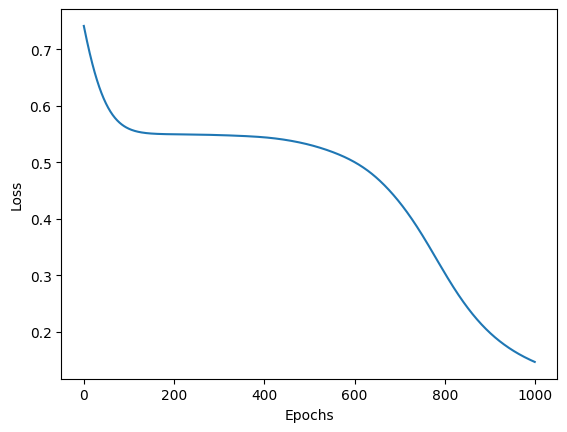

Training Losses are 
          0
0  0.667559
1  0.662548
2  0.657660
3  0.652898
4  0.648261
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[2968   76]
 [  91  865]]
Accuracy: 0.9583, Precision: 0.9192, Recall: 0.9048, F1-score: 0.9120

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[2970   74]
 [  72  884]]
Accuracy: 0.9635, Precision: 0.9228, Recall: 0.9247, F1-score: 0.9237



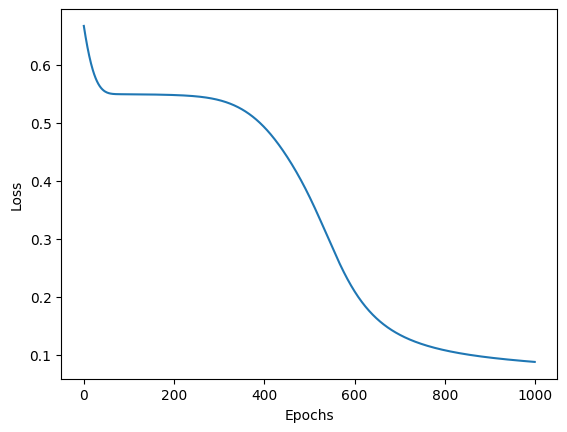

Training Losses are 
          0
0  0.665139
1  0.656209
2  0.647671
3  0.639529
4  0.631787
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[2966   78]
 [  86  870]]
Accuracy: 0.9590, Precision: 0.9177, Recall: 0.9100, F1-score: 0.9139

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[2965   79]
 [  68  888]]
Accuracy: 0.9633, Precision: 0.9183, Recall: 0.9289, F1-score: 0.9236



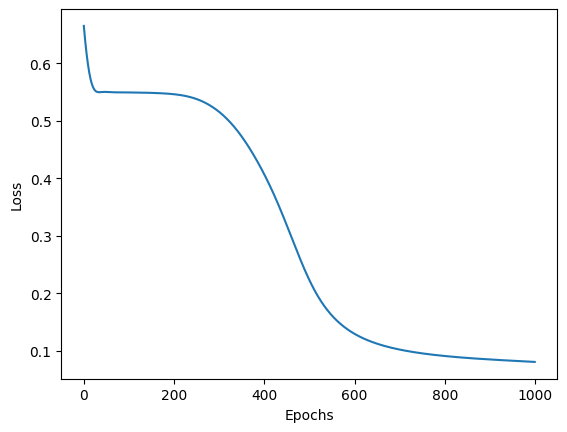

Training Losses are 
          0
0  0.668320
1  0.666187
2  0.664078
3  0.661993
4  0.659933
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[2979   65]
 [ 130  826]]
Accuracy: 0.9513, Precision: 0.9270, Recall: 0.8640, F1-score: 0.8944

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[2978   66]
 [ 131  825]]
Accuracy: 0.9507, Precision: 0.9259, Recall: 0.8630, F1-score: 0.8933



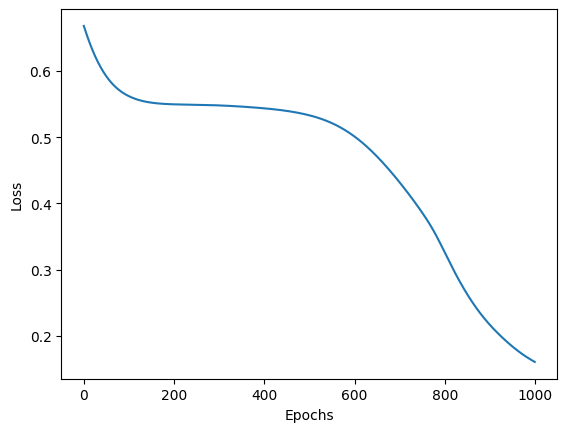

Training Losses are 
          0
0  0.601665
1  0.599406
2  0.597197
3  0.595039
4  0.592934
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[2966   78]
 [  87  869]]
Accuracy: 0.9587, Precision: 0.9176, Recall: 0.9090, F1-score: 0.9133

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[2966   78]
 [  67  889]]
Accuracy: 0.9637, Precision: 0.9193, Recall: 0.9299, F1-score: 0.9246



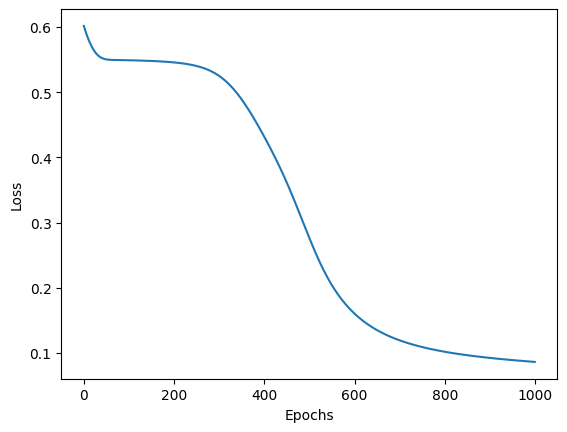

Training Losses are 
          0
0  0.662201
1  0.656818
2  0.651573
3  0.646470
4  0.641510
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[2971   73]
 [  97  859]]
Accuracy: 0.9575, Precision: 0.9217, Recall: 0.8985, F1-score: 0.9100

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[2966   78]
 [  81  875]]
Accuracy: 0.9603, Precision: 0.9182, Recall: 0.9153, F1-score: 0.9167



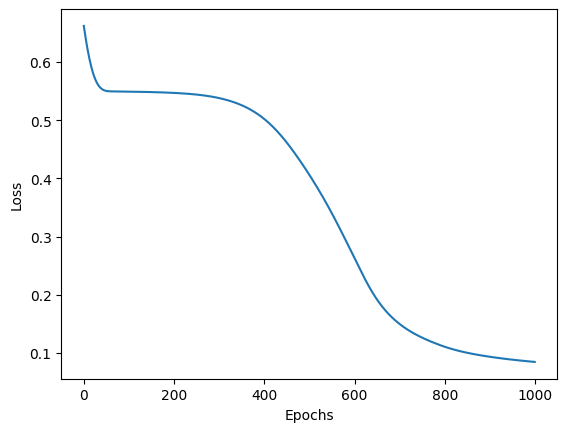

Training Losses are 
          0
0  0.729381
1  0.717385
2  0.705845
3  0.694764
4  0.684148
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[2966   78]
 [  90  866]]
Accuracy: 0.9580, Precision: 0.9174, Recall: 0.9059, F1-score: 0.9116

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[2971   73]
 [  70  886]]
Accuracy: 0.9643, Precision: 0.9239, Recall: 0.9268, F1-score: 0.9253



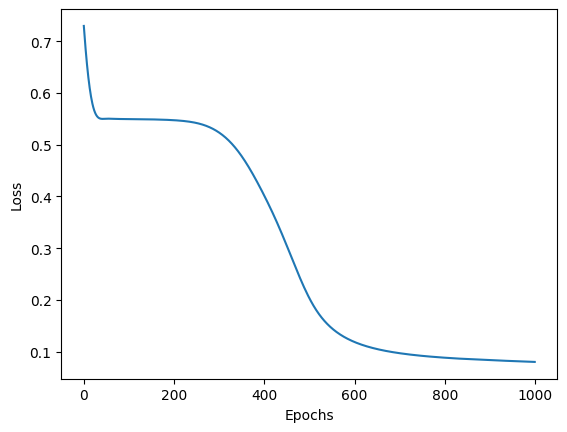

Training Losses are 
          0
0  0.689338
1  0.685750
2  0.682218
3  0.678742
4  0.675325
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[2972   72]
 [ 126  830]]
Accuracy: 0.9505, Precision: 0.9202, Recall: 0.8682, F1-score: 0.8934

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[2975   69]
 [ 121  835]]
Accuracy: 0.9525, Precision: 0.9237, Recall: 0.8734, F1-score: 0.8978



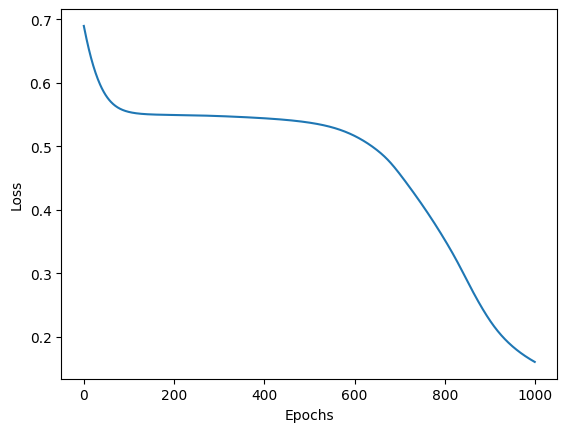

Training Losses are 
          0
0  0.712627
1  0.707593
2  0.702650
3  0.697798
4  0.693038
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[2968   76]
 [  94  862]]
Accuracy: 0.9575, Precision: 0.9190, Recall: 0.9017, F1-score: 0.9102

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[2959   85]
 [  83  873]]
Accuracy: 0.9580, Precision: 0.9113, Recall: 0.9132, F1-score: 0.9122



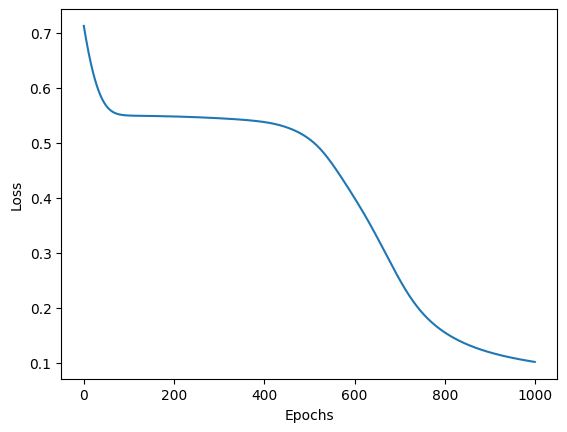

Training Losses are 
          0
0  0.834491
1  0.824390
2  0.814497
3  0.804816
4  0.795348
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[2969   75]
 [ 102  854]]
Accuracy: 0.9557, Precision: 0.9193, Recall: 0.8933, F1-score: 0.9061

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[2962   82]
 [  86  870]]
Accuracy: 0.9580, Precision: 0.9139, Recall: 0.9100, F1-score: 0.9119



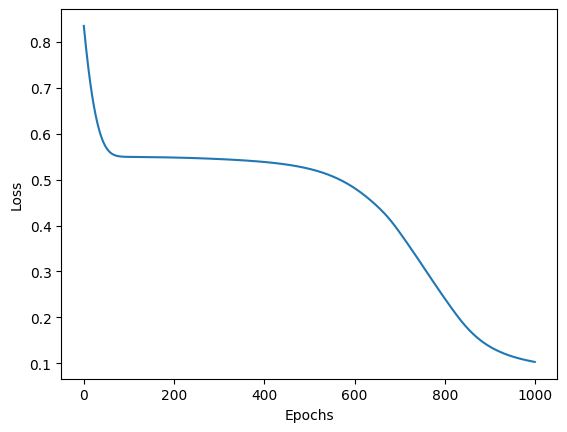

Training Losses are 
          0
0  0.820319
1  0.801978
2  0.784353
3  0.767448
4  0.751268
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[2967   77]
 [  93  863]]
Accuracy: 0.9575, Precision: 0.9181, Recall: 0.9027, F1-score: 0.9103

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[2968   76]
 [  75  881]]
Accuracy: 0.9623, Precision: 0.9206, Recall: 0.9215, F1-score: 0.9211



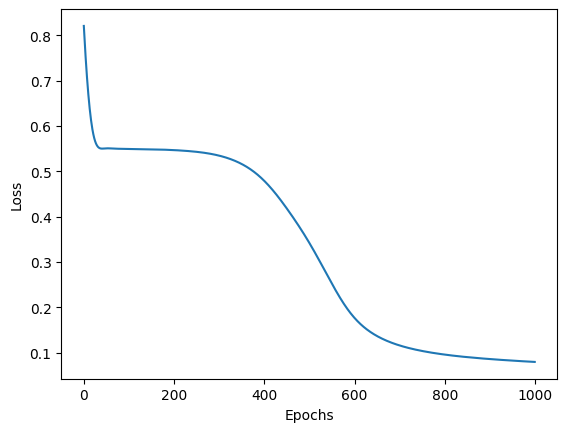

In [ ]:
nuerons = [8,16,32,64]
best_score=0
layer1=0
layer2=0
layer3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = TripleLayer(49,nueron,double_nueron,triple_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      if acc > best_score:
          best_score=acc
          layer1=nueron
          layer2=double_nueron
          layer3=triple_nueron
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()
print(f"The best accuracy on test data is {best_score} for layers {layer1} , {layer2}, {layer3}")

In [12]:
print(X_training.shape)

(12000, 50)
